In [1]:
# important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Part-1


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Python_Core_DA_ML_DS/Machine Learning/ML_Projects/Seoul Bike Sharing Demand Prediction/data/SeoulBikeData.csv',
                 encoding ='unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.shape

(8760, 14)

In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
# check the describe--> Numerical and Categorical Data
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [6]:
# check null and duplicates values
print('Null values : ',df.isnull().sum().sum())
print('Duplicate values : ',df.duplicated().sum().sum())

Null values :  0
Duplicate values :  0


In [7]:
# convert Date columns object --> datetime...
df['Date'] = pd.to_datetime(df['Date'],format='mixed')
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.day_name()
df.drop(columns=['Date'],inplace=True)
df.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Day                        8760 non-null   int32

In [9]:
# explanation of conversion
date_strings = ["13/12/2017", "12/13/2017", "2017-12-13"]
parsed_dates = pd.to_datetime(date_strings, format='mixed')
parsed_dates

DatetimeIndex(['2017-12-13', '2017-12-13', '2017-12-13'], dtype='datetime64[ns]', freq=None)

# Part-2

In [10]:
# sns.pairplot(df)
# plt.show()

In [11]:
# Find the Insight from pair plot between Bike count and another feature.
# 1) with Year : Demand is incerases in 2018 compare to 2017.
# 2) Month : Demand is increase inbetween the year.
# 3) Day : No More Insight found
# 4) Snowfall : 0 snowfall --> More bike demand ...
# 5) Rainfall : 0 rainfall --> More bike demand ...
# 6) Rainfall & snowfall have same relationship so, we take only 1 from these 2.
# 7) SolarRadiation : low solar intention --> More bike Demand
# 8) Dew Point : dew > 0 --> Bike demand is increase.
# 9) Visibility: No proper relationship found
# 10) Wind Speed : low wind speed --> More bike Demand
# 11) Humidity : Average Humidity --> More Bike Demand
# 12) Temperature : with average temp. --> More bike Deamnd
# 13) Houre : At Morning 6-7 and at evening at 6-7 --> More bike Demand
# 14) You can find the more insight from other columns.....

# Part - 3 --> EDA

In [12]:
df.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


<Axes: xlabel='Month'>

<Figure size 400x200 with 0 Axes>

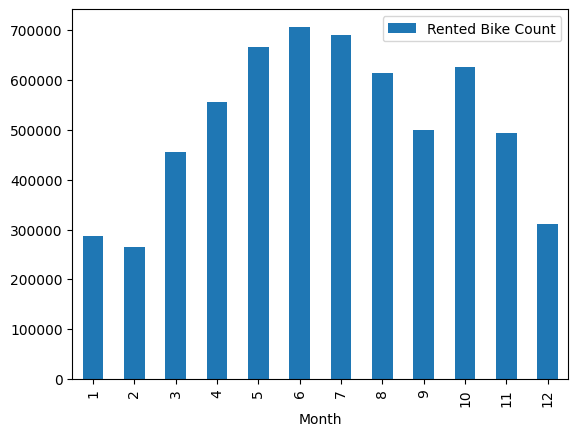

In [13]:
# with Month
plt.figure(figsize=(4,2))
(df.groupby('Month')['Rented Bike Count'].sum().reset_index()).plot(kind='bar',x= 'Month',y='Rented Bike Count')

<Axes: xlabel='Day'>

<Figure size 400x200 with 0 Axes>

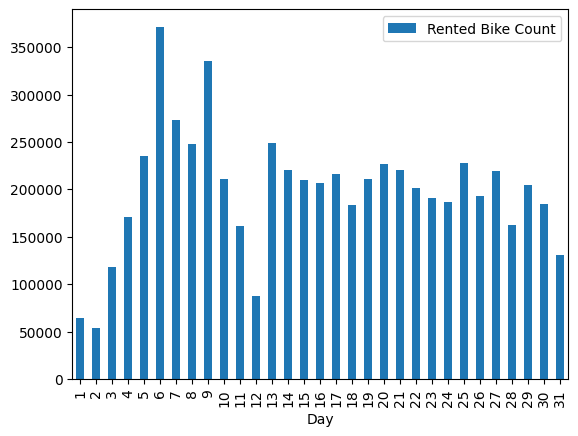

In [14]:
# with Day
plt.figure(figsize=(4,2))
(df.groupby('Day')['Rented Bike Count'].sum().reset_index()).plot(kind='bar',x= 'Day',y='Rented Bike Count')

<Axes: xlabel='Weekday'>

<Figure size 400x200 with 0 Axes>

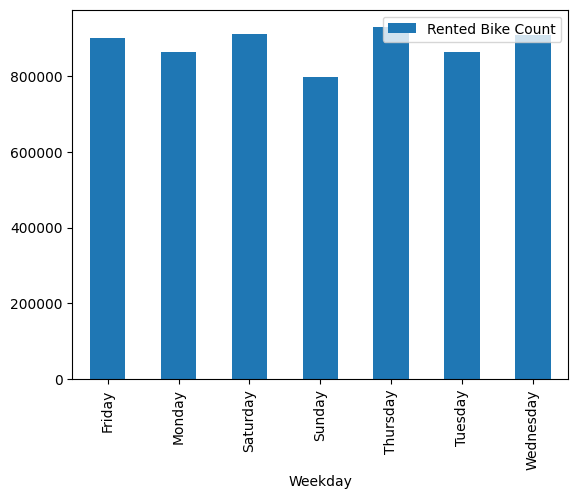

In [15]:
# with Weekday
plt.figure(figsize=(4,2))
(df.groupby('Weekday')['Rented Bike Count'].sum().reset_index()).plot(kind='bar',x= 'Weekday',y='Rented Bike Count')

<Axes: xlabel='Hour'>

<Figure size 400x200 with 0 Axes>

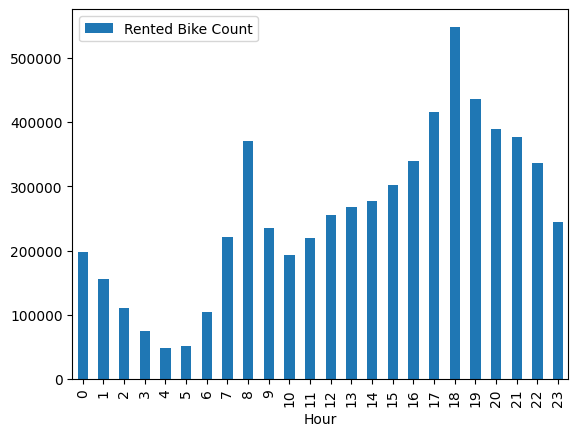

In [16]:
# with Hour
plt.figure(figsize=(4,2))
(df.groupby('Hour')['Rented Bike Count'].sum().reset_index()).plot(kind='bar',x= 'Hour',y='Rented Bike Count')

<ipython-input-17-10776c820480>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Holiday',y='Rented Bike Count',palette=sns.color_palette('pastel'))
<ipython-input-17-10776c820480>:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=df, x='Holiday',y='Rented Bike Count',palette=sns.color_palette('pastel'))


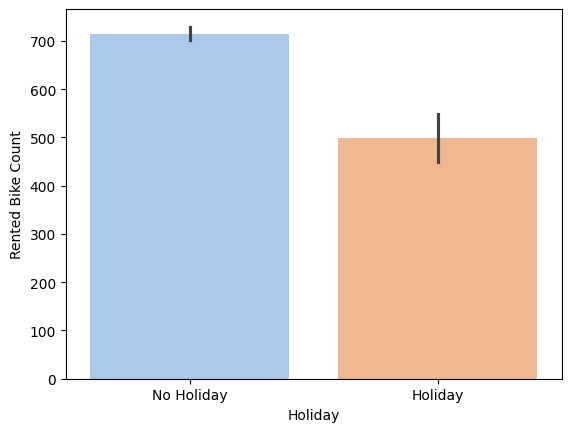

In [17]:
# with Holiday
sns.barplot(data=df, x='Holiday',y='Rented Bike Count',palette=sns.color_palette('pastel'))
plt.show()

<ipython-input-18-e8be9e848aa7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Seasons',y='Rented Bike Count',palette=sns.color_palette('pastel'))
<ipython-input-18-e8be9e848aa7>:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data=df, x='Seasons',y='Rented Bike Count',palette=sns.color_palette('pastel'))


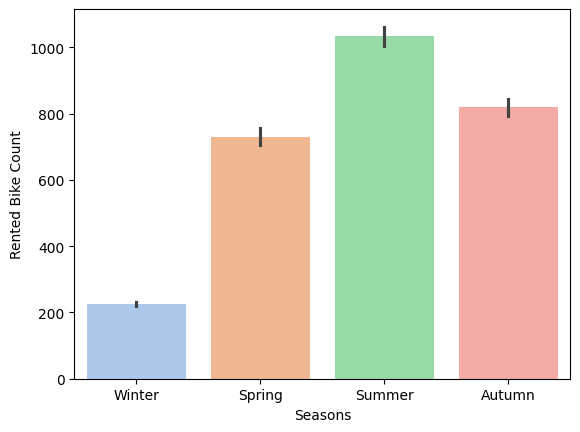

In [18]:
# with Seasons
sns.barplot(data=df, x='Seasons',y='Rented Bike Count',palette=sns.color_palette('pastel'))
plt.show()

<ipython-input-19-ae3b87657c3a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Rainfall(mm)',y='Rented Bike Count',palette=sns.color_palette('pastel'))
<ipython-input-19-ae3b87657c3a>:3: UserWarning: 
The palette list has fewer values (10) than needed (61) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df, x='Rainfall(mm)',y='Rented Bike Count',palette=sns.color_palette('pastel'))


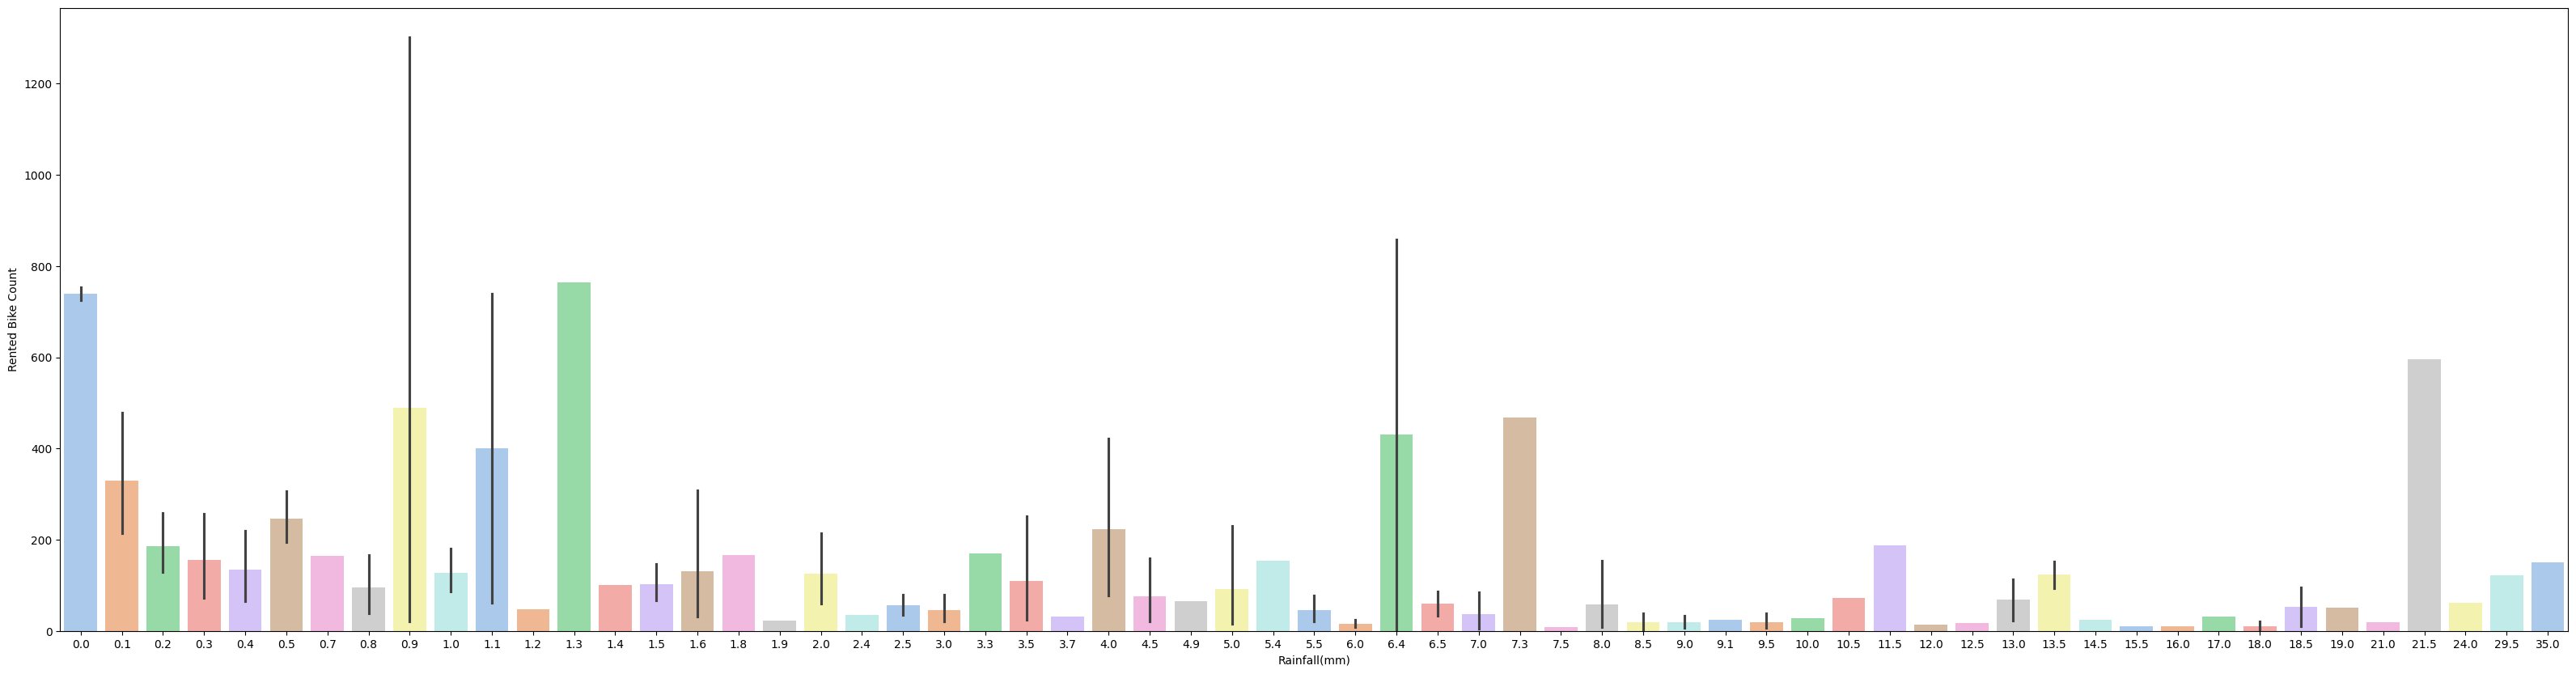

In [19]:
# with Rainfall(mm)
plt.figure(figsize=(40,10))
sns.barplot(data=df, x='Rainfall(mm)',y='Rented Bike Count',palette=sns.color_palette('pastel'))
plt.show()

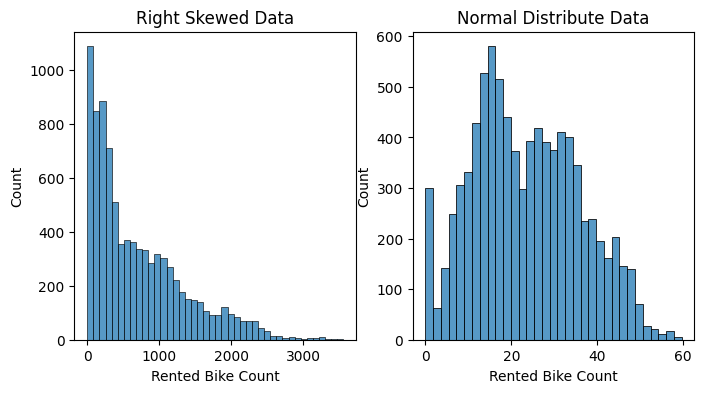

In [20]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(df['Rented Bike Count']) #--> Right skew data
plt.title('Right Skewed Data')

plt.subplot(1,2,2)
sns.histplot(np.sqrt(df['Rented Bike Count']))
plt.title('Normal Distribute Data')
plt.show()

# Part -4 --> Skewness

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Day                        8760 non-null   int32

In [22]:
# check the skewness of all numerical data.
df.select_dtypes(include=[int,float]).skew().sort_values(ascending=True)
# skewness < 0 --> Left skewed
# skewness = 0 --> No skewness
# skewness > 0 --> Right skewed

Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

In [23]:
# we got Outliers in
# 1) windspeed
# 2) snowfall
# 3) rainfall
# But at this time we don't remove outlier, it can be help full for model, we will remove it
# if our model not provide good accuracy by different techniques.

# Part - 5 --> Colinearity and Multicolinearity (Remove)



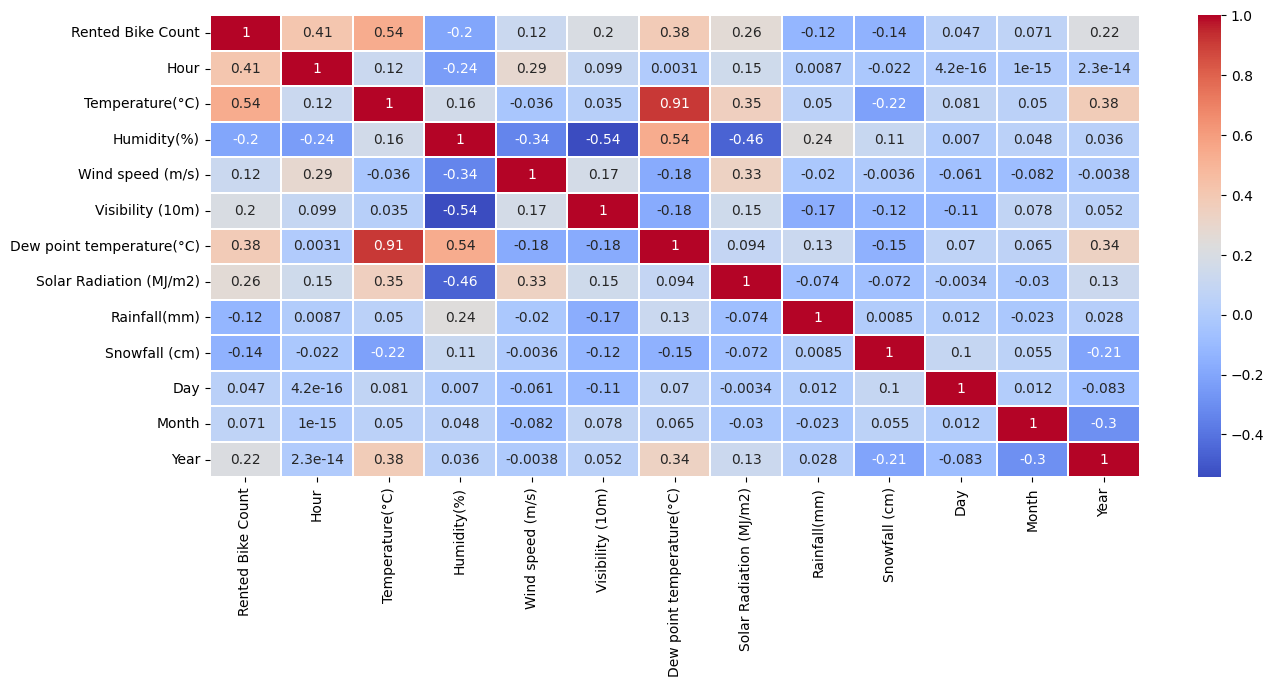

In [24]:
plt.figure(figsize=(15,6))
sns.heatmap(df.select_dtypes(include=[int,float]).corr(),cmap="coolwarm",annot=True,linewidth=0.2)
plt.show()
# observe Rented Bike Count with another columns and note down the relation.

In [25]:
# Colinearity (Rental Bike Count --> to rest columns)
#----------------------------------------------------------
# reuslt / Insights
# Very less Relation : Day, Month, Year, Rented Bike Count (Not considerable)
# rainfall and snowfall have same so that we can use only one of them.
# High : Hour, Temp, Dew Temp.,

# Multicolinearity (all columns --> to remaining)
#---------------------------------------------------------
# Dew point temp. and Temperature have high relatinoship so that we can only choose one of them.
# but temperature > Dew temp. with respect to Rental Bike Count so we remove Dew temp

In [26]:
# check with the proper method with statistical....

# Variance Inflation Factor (VIF) is a measure used in statistics and econometrics to detect multicollinearity in a set of multiple regression variables.
# Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated, meaning they provide redundant information about the response variable.
# This redundancy can inflate the variances of the regression coefficients, making them unstable and difficult to interpret.

In [27]:
# A VIF of 1 indicates no correlation between the

# A VIF of 1 indicates no correlation between i-th predictor and the other predictors, suggesting no multicollinearity.
# A VIF between 1 and 5 indicates moderate multicollinearity, which is usually not problematic.
# A VIF greater than 5 suggests high multicollinearity, and values above 10 indicate severe multicollinearity, which can be problematic.

In [28]:
def get_vif(df):
  vif = pd.DataFrame()
  vif['Features']  = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]

  return vif

In [29]:
not_for_vif = ['Rented Bike Count','Day','Month','Year']
x = [i for i in df.columns if not i in not_for_vif ]
temp_df = df[x].select_dtypes(include=[int,float])
get_vif(temp_df)
# here we got high with Temperature and Dew point temp.--> so need to remove both
# we checked above no need to remove both , Temp. is more correlate so just remove Dew Point
# check again......

,Features,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


In [30]:
# check without dew point temperature
x.remove('Dew point temperature(°C)')
temp_df = df[x].select_dtypes(include=[int,float])
get_vif(temp_df)
# now here all are in average 1 to 5 range.

,Features,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


In [31]:
# drop Dew point temperature(°C)
df.drop(columns=['Dew point temperature(°C)'],inplace=True)

# Part - 6 --> Encoding (Object -> Numerical)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Day                      8760 non-null   int32  
 13  Month                    8760 non-null   int32  
 14  Year                    

In [33]:
# One Hot Encoding : Weekday, Seasons
# Ordinal Encoding : Holiday, Functioning Day

In [34]:
try_df = df.copy()
# just for safe side

In [35]:
# Functioning Day
try_df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [36]:
# Holiday
try_df.Holiday.value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [37]:
# Ordinal Encoding
oe = OrdinalEncoder(categories=[['No Holiday','Holiday'],['No','Yes']])
try_df[['Holiday','Functioning Day']] = oe.fit_transform(try_df[['Holiday','Functioning Day']])
try_df.head()

# OR
# try_df['Holiday'] = try_df['Holiday'].replace({'No Holiday':0, 'Holiday':1})
# try_df['Functioning Day'] = try_df['Functioning Day'].replace({'No':0, 'Yes':1})

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,0.0,1.0,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,0.0,1.0,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,0.0,1.0,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,0.0,1.0,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,0.0,1.0,12,1,2017,Thursday


In [38]:
# One Hot Encoding
ohe = OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore')
encoded_data = ohe.fit_transform(try_df[['Seasons','Weekday']])
encoded_columns = ohe.get_feature_names_out(['Seasons','Weekday'])
x_df = pd.DataFrame(encoded_data,columns=encoded_columns)
x_df.columns =['Spring','Summer','Winter','Monday','Saturday','Sunday','Thursday',
               'Tuesday','Wednesday']
x_df.head()

# OR
# df_season = pd.get_dummies(try_df['Seasons'],drop='first')
# df_weekday = pd.get_dummies(try_df['Weekday'],drop='first')
# last_df = pd.concat([try_df,df_season,df_weekday],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
try_df = pd.concat([try_df,x_df],axis=1).drop(columns=['Seasons','Weekday'])
df = try_df.copy()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   float64
 10  Functioning Day          8760 non-null   float64
 11  Day                      8760 non-null   int32  
 12  Month                    8760 non-null   int32  
 13  Year                     8760 non-null   int32  
 14  Spring                  

# Part - 7 --> Spliting and Feature Scalling

In [41]:
# Independent and Dependent Data
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

In [73]:
X.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day', 'Month', 'Year',
       'Spring', 'Summer', 'Winter', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [42]:
# Spliting : Train and Test Data Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=2023)
print('Shape of X_train : ',X_train.shape)
print('Shape of X_test : ',X_test.shape)
print('Shape of y_train : ',y_train.shape)
print('Shape of y_test : ',y_test.shape)
# all splitted data now in numpy array.
# you need to pass ML model always in numpy array.

Shape of X_train :  (7008, 22)
Shape of X_test :  (1752, 22)
Shape of y_train :  (7008,)
Shape of y_test :  (1752,)


In [43]:
# Scaling :  here all values in different unit and values so need to scalling that data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
# check attributes of sc..
print('Mean :', sc.mean_)
print('Scale :',sc.scale_)
# you can inveres it
# sc.inverse_transform(X_train)

Mean : [1.15323916e+01 1.28319920e+01 5.81522546e+01 1.71738014e+00
 1.44041795e+03 5.67796804e-01 1.52539954e-01 7.52283105e-02
 4.92294521e-02 9.67751142e-01 1.56787957e+01 6.51341324e+00
 2.01791510e+03 2.48002283e-01 2.52711187e-01 2.50856164e-01
 1.36986301e-01 1.42551370e-01 1.48829909e-01 1.42551370e-01
 1.41267123e-01 1.48829909e-01]
Scale : [6.92676802e+00 1.20220548e+01 2.04570722e+01 1.03437653e+00
 6.06508248e+02 8.64469525e-01 1.18093896e+00 4.29006703e-01
 2.16346743e-01 1.76660323e-01 8.78578762e+00 3.45640534e+00
 2.78737249e-01 4.31853159e-01 4.34566730e-01 4.33505881e-01
 3.43832888e-01 3.49614755e-01 3.55920731e-01 3.49614755e-01
 3.48296889e-01 3.55920731e-01]


# Part - 8 --> Train the ML Model

### Linear Regression

In [45]:
# train and predict through Linear Regression Model.

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [46]:
# Evaluation
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test,y_pred)
R2_Score = r2_score(y_test,y_pred)
print('MSE : ',MSE) # need : close to 0 --> for best fit
print('RMSE : ',RMSE) # need : close to 0 --> for best fit
print('MAE : ',MAE) # need : close to 0 --> for best fit
print('R2_Score Accuracy Score: ',R2_Score) # need : close to 1 --> for best fit--> It shows only 53% accuracy
# Here not all condition is satisfide so we will not use LInear regression model

MSE :  188944.7647024072
RMSE :  434.67777111603857
MAE :  330.9044419713851
R2_Score Accuracy Score:  0.5371041582058085


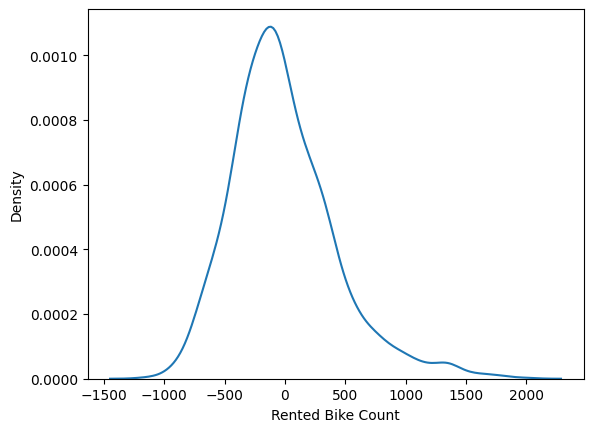

Skewness : 0.9415969010789154


In [47]:
# chgececk with kde plot
sns.kdeplot(y_test-y_pred)
plt.show()
print('Skewness :',(y_test-y_pred).skew())
# NOt a proper Accurate

In [48]:
# Conclusion : --> Linear Regression MOdel is not accurate because onlt 53% accuracy

# Part - 9 --> Other Model Checking

In [49]:
# Importing Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
! pip install XGBoost
from xgboost import XGBRegressor


In [50]:
# create function for Score and Error
def model_score(y_test,y_pred,model):
  MSE = mean_squared_error(y_test,y_pred)
  RMSE = np.sqrt(MSE)
  MAE = mean_absolute_error(y_test,y_pred)
  R2_Score = r2_score(y_test,y_pred)
  print(f"{model} : ['MSE':{MSE.round(3)}, 'RMSE':{RMSE.round(3)}, 'MAE':{MAE.round(3)},'R2':{R2_Score.round(3)}]")


### Train and predict Model

In [51]:
# Create model Fit and predict

# LinearRgressor
lr = LinearRegression().fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

# Lasso
lso = Lasso().fit(X_train,y_train)
y_pred_lso = lso.predict(X_test)

# Ridge
rdg = Ridge().fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

# PolynomialFeatures
plf = PolynomialFeatures(2)
X_train_plf = plf.fit_transform(X_train)
X_test_plf = plf.fit_transform(X_test)
plf_lr = LinearRegression().fit(X_train_plf,y_train)
y_pred_poly = plf_lr.predict(X_test_plf)

# SVR
svr = SVR().fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)

# DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_dtr = dtr.predict(X_test)

# KNNRegressor
knr = KNeighborsRegressor().fit(X_train,y_train)
y_pred_knr = knr.predict(X_test)

# RandomForestRegressor
rfr = RandomForestRegressor().fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

# AdaBoostRegressor
adb = AdaBoostRegressor().fit(X_train,y_train)
y_pred_adb = adb.predict(X_test)

# GradientBoostingRegressor
gbr = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)

# XGBRegressor
xgbr = XGBRegressor().fit(X_train,y_train)
y_pred_xgbr = xgbr.predict(X_test)

In [52]:
# Prediction
model_score(y_test,y_pred_lr,'LinearRegression')
model_score(y_test,y_pred_lso,'Lasso')
model_score(y_test,y_pred_rdg,'Ridge')
model_score(y_test,y_pred_poly,'PolynomialFeatures')
model_score(y_test,y_pred_svr,'SVR')
model_score(y_test,y_pred_dtr,'DecisionTreeRegressor')
model_score(y_test,y_pred_knr,'KNeighborsRegressor')
model_score(y_test,y_pred_rfr,'RandomForestRegressor')
model_score(y_test,y_pred_adb,'AdaBoostRegressor')
model_score(y_test,y_pred_gbr,'GradientBoostingRegressor')
model_score(y_test,y_pred_xgbr,'XGBRegressor')

LinearRegression : ['MSE':188944.765, 'RMSE':434.678, 'MAE':330.904,'R2':0.537]
Lasso : ['MSE':188895.35, 'RMSE':434.621, 'MAE':330.551,'R2':0.537]
Ridge : ['MSE':188944.168, 'RMSE':434.677, 'MAE':330.898,'R2':0.537]
PolynomialFeatures : ['MSE':125310.286, 'RMSE':353.992, 'MAE':248.196,'R2':0.693]
SVR : ['MSE':318011.649, 'RMSE':563.925, 'MAE':386.276,'R2':0.221]
DecisionTreeRegressor : ['MSE':88770.401, 'RMSE':297.944, 'MAE':166.69,'R2':0.783]
KNeighborsRegressor : ['MSE':102739.999, 'RMSE':320.531, 'MAE':210.222,'R2':0.748]
RandomForestRegressor : ['MSE':40854.467, 'RMSE':202.125, 'MAE':120.858,'R2':0.9]
AdaBoostRegressor : ['MSE':196654.866, 'RMSE':443.458, 'MAE':382.926,'R2':0.518]
GradientBoostingRegressor : ['MSE':64093.093, 'RMSE':253.166, 'MAE':172.764,'R2':0.843]
XGBRegressor : ['MSE':33114.133, 'RMSE':181.973, 'MAE':113.528,'R2':0.919]


### **We Found 2 best model on this Data :**<br>
1) RandomForestRegressor : 90% accuracy with low error <br>
2) XGBRegressor : 91% accuracy with low error <br>

### Model Visualization

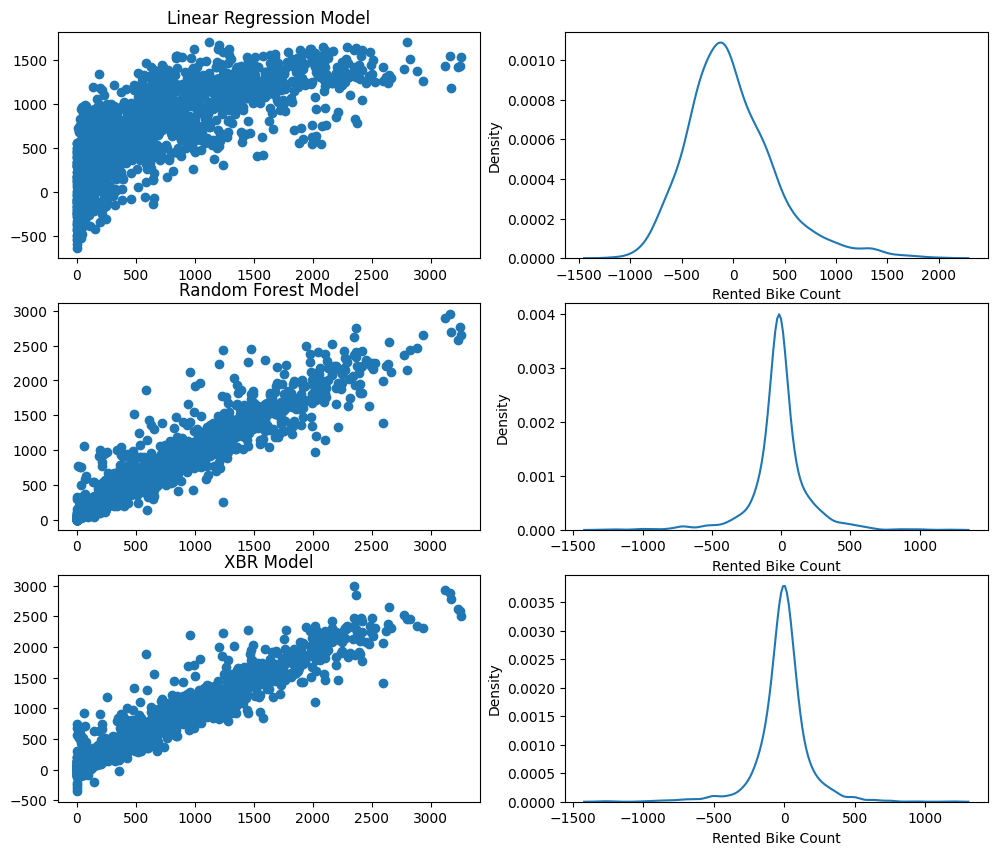

In [53]:
fig,ax = plt.subplots(3,2,figsize=(12,10))

ax[0,0].set_title('Linear Regression Model')
ax[0,0].scatter(y_test,y_pred_lr)
sns.kdeplot(y_test-y_pred_lr,ax=ax[0,1])

ax[1,0].set_title('Random Forest Model')
ax[1,0].scatter(y_test,y_pred_rfr)
sns.kdeplot(y_test-y_pred_rfr,ax=ax[1,1])

ax[2,0].set_title('XBR Model')
ax[2,0].scatter(y_test,y_pred_xgbr)
sns.kdeplot(y_test-y_pred_xgbr,ax=ax[2,1])
plt.show()

# Part - 10 --> Cross validation & Fine Tune Model

In [54]:
# There are 2 cross validation techniques
# 1) RandomizedSearchCV --> Here we use this......
# 2) GridSearchCV

In [55]:
from sklearn.model_selection import RandomizedSearchCV

### Hyperparameter Tuning of RandomForestRegressor

In [56]:
# RandomForestRegressor  :  Fine tune and cross validation

# The number of trees in the forest.
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Maximum no. of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]

# Minimum no. of samples required to split the node.
min_samples_split = [2, 5, 10]

# Minimum no. of samples required at each leaf node.
min_samples_leaf = [1, 2, 4]

# No. of features to be considered at every split
max_features = ['auto', 'sqrt']

# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
bootstrap = [True, False]

parameters = {'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,'max_features':max_features,'bootstrap':bootstrap}



In [57]:
# --- It takes too much time so we commented it and directly use best_params which has already obtain by run program in video.
#_------------------------------------------------------------------------------------------------------------------------
# import time
# start = time.time()

# rf_random = RandomizedSearchCV(RandomForestRegressor(),parameters,cv=3,n_iter=100,n_jobs=-1,verbose=2,random_state=242)
# rf_random.fit(X_train,y_train)
# y_pred_rf_random = rf_random.predict(X_test)

# print('Time taken : ',time.time()-start)

In [58]:
# rf_random.best_params_
#----->
# {'n_estimators':400,'max_depth':120,'min_samples_split':2,
# 'min_samples_leaf':1,'max_features':'sqrt','bootstrap':False}

In [59]:
# with best parameters
rf_tuned = RandomForestRegressor(n_estimators=400,max_depth=120,min_samples_split=2,
                                 min_samples_leaf=1,max_features='sqrt',bootstrap=False)
rf_tuned.fit(X_train,y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)
model_score(y_test,y_pred_rf_tuned,'Random Forest Tuned')
# we got mor accuracy compare to pevious random forest model ----> Now : 90.8%

Random Forest Tuned : ['MSE':37748.646, 'RMSE':194.29, 'MAE':122.237,'R2':0.908]


### Hyperparameter Tuning of XGBoostRegressor

In [60]:
# # for XGBR Hyperparameter Tunning
# params = {'max_depth':[3,5,6,10,15,20],
#           'learning_rate':[0.01,0.1,0.2,0.3],
#           'subsample':np.arange(0.5,1.0,0.1),
#           'colsample_bytree':np.arange(0.4,1.0,0.1),
#           'colsample_bylevel':np.arange(0.4,1.0,0.1),
#           'n_estimators':[100,500,1000]}

# rscv = RandomizedSearchCV(XGBRegressor(seed=20),params,scoring='neg_mean_squared_error',
#                    n_iter=25,cv=5,verbose=1)
# rscv.fit(X_train,y_train)
# y_pred_xgbr_random = rscv.predict(X_test)

In [61]:
# rscv.best_params_
#---->
#{'max_depth': 6,
#           'learning_rate':0.09,
#           'subsample': 0.6,
#           'colsample_bytree': 0.7,
#           'colsample_bylevel': 0.4,
#           'n_estimators': 1000}


In [62]:
xgbr_tuned = XGBRegressor(max_depth=6,learning_rate=0.09,subsample=0.6,
                           colsample_bytree=0.7,colsample_bylevel=0.4,n_estimators=1000,seed=20)
xgbr_tuned.fit(X_train,y_train)
y_pred_xgbr_tuned = xgbr_tuned.predict(X_test)
model_score(y_test,y_pred_xgbr_tuned,'XGBRegressor Tuned')

# we got mor accuracy compare to pevious random forest model ----> Now : 0.927

XGBRegressor Tuned : ['MSE':28377.759, 'RMSE':168.457, 'MAE':105.668,'R2':0.93]


# Part - 11 --> Save Best ML Model / use that model for inferance

In [63]:
import pickle

### Dump Model

In [64]:
# dump the model for future use...
pickle.dump(xgbr_tuned,open('xgboost_regressor_r3_0_93_v1.pkl','wb'))
# xgboost_regressor_r3_0_93_v1 --> 'modelname_scoringparams_score_version'

### Load Model and Predict data [ Inferance ]

In [65]:
path = r"/content/drive/MyDrive/Python_Core_DA_ML_DS/Machine Learning/ML_Projects/Seoul Bike Sharing Demand Prediction/xgboost_regressor_r3_0_93_v1.pkl"
model = pickle.load(open(path,'rb'))

In [66]:
prediction = model.predict(X_test)

In [67]:
r2_score(y_test,prediction)
# now it is consist with 93% accuracy....

0.9304773180400309

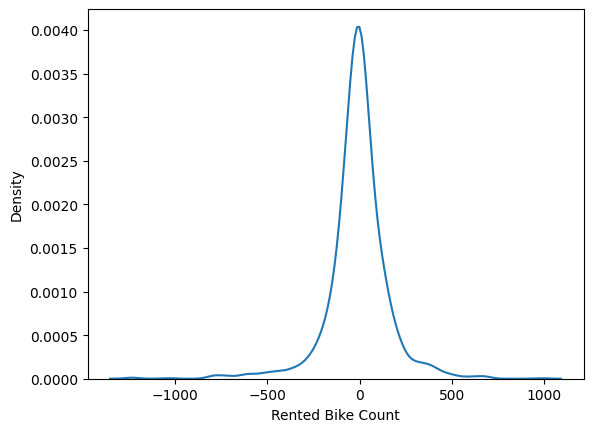

In [68]:
sns.kdeplot(y_test-prediction)
plt.show()

# Part - 12 --> Dump StandardScaler for Future Prediction

### Dump StandardScaler

In [69]:
sc

StandardScaler()

In [70]:
# Dump StandardScaler
pickle.dump(sc,open('StandardScaler.pkl','wb'))

### Load StandardScaler

In [71]:
# load StandardScaler
sc = pickle.load(open('/content/StandardScaler.pkl','rb'))
sc.mean_

array([1.15323916e+01, 1.28319920e+01, 5.81522546e+01, 1.71738014e+00,
       1.44041795e+03, 5.67796804e-01, 1.52539954e-01, 7.52283105e-02,
       4.92294521e-02, 9.67751142e-01, 1.56787957e+01, 6.51341324e+00,
       2.01791510e+03, 2.48002283e-01, 2.52711187e-01, 2.50856164e-01,
       1.36986301e-01, 1.42551370e-01, 1.48829909e-01, 1.42551370e-01,
       1.41267123e-01, 1.48829909e-01])

# Go to the Inferance.ipynb file